In [5]:
import sys
sys.path.append('../')
from tqdm import tqdm
import numpy as np
import healpy as hp
from tqdm.contrib import tzip
import matplotlib.pyplot as plt

In [6]:
%load_ext autoreload
%autoreload 2
from ptep_mbs.pipeline import Sims

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
s_64 = Sims('../ptep_mbs/configs/config_PTEP_20200915_compsep.py')
s_32 = Sims('../ptep_mbs/configs/config_PTEP_20200915_compsep_test.py')

Foreground simulation for component dust: 100%|██████████| 22/22 [01:08<00:00,  3.10s/channel]


Foreground simulation for component dust: 100%|██████████| 22/22 [00:00<00:00, 138.15channel/s]


In [5]:
sim_no = 1


In [7]:
cmb_64,fg,noise,coadded = s_64.generate_sim(sim_no)
cmb_32,fg,noise,coadded = s_32.generate_sim(sim_no)

Keeping as float64


Noise simulation: 100%|██████████| 22/22 [00:00<00:00, 68.48channel/s]


Converted to float32


Noise simulation: 100%|██████████| 22/22 [00:00<00:00, 76.59channel/s]


In [8]:
b_32,b_64 = [],[]
for d_32,d_64 in tzip(cmb_32, cmb_64):
    b_32.append(hp.alm2cl(hp.map2alm(d_32)[-1]))
    b_64.append(hp.alm2cl(hp.map2alm(d_64)[-1]))
b_32 = np.array(b_32)
b_64 = np.array(b_64)

  0%|          | 0/22 [00:00<?, ?it/s]

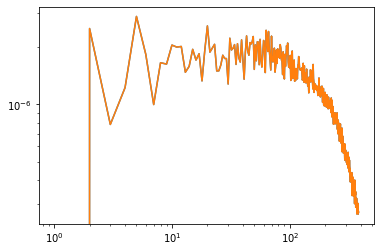

In [9]:
plt.loglog(b_32.mean(0),label='32')
plt.loglog(b_64.mean(0),label='64')

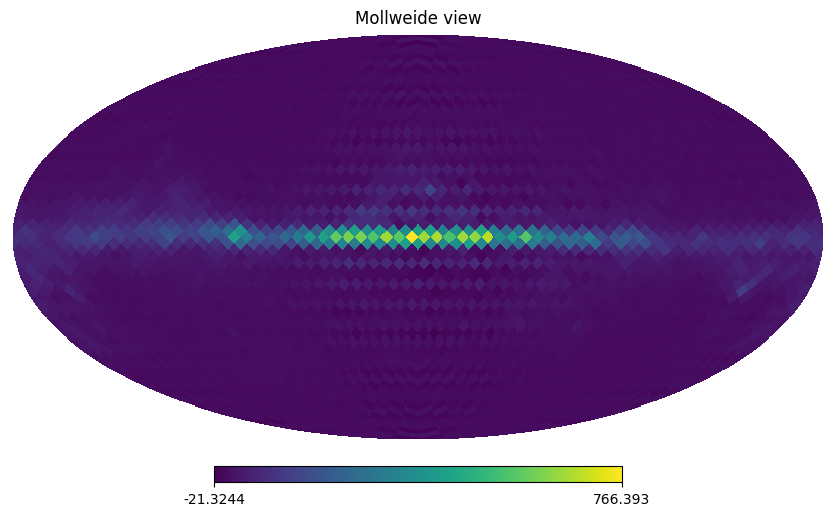

In [9]:
hp.mollview(fg[2][0])

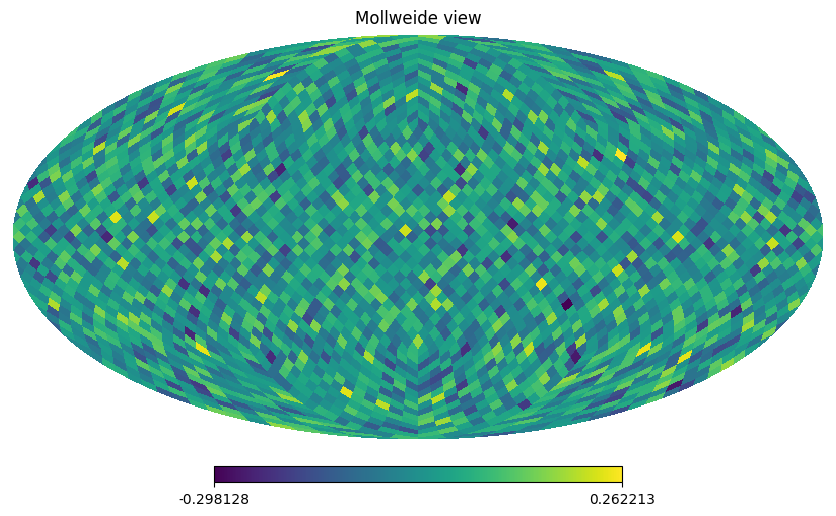

In [10]:
hp.mollview(noise[2][0])

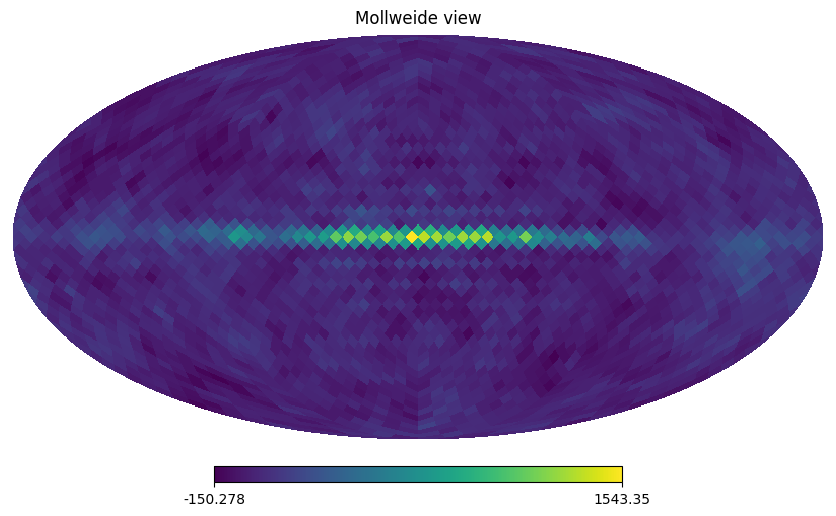

In [11]:
hp.mollview(coadded[7][0])